In [23]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [24]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


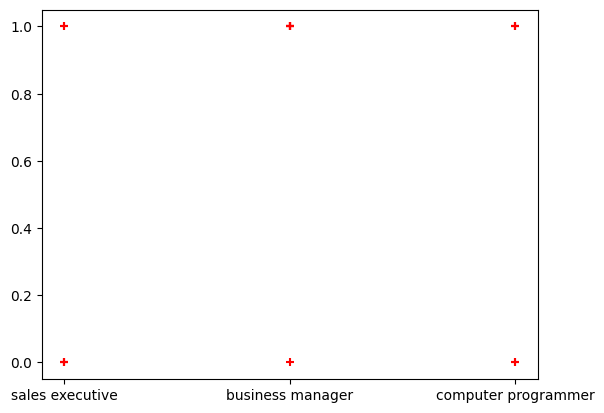

In [4]:
plt.scatter(df['job'],df['salary_more_then_100k'],marker='+',color='red')

<Axes: xlabel='company'>

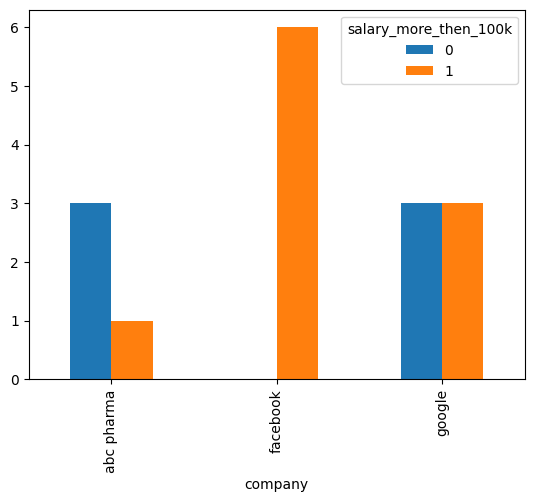

In [19]:
pd.crosstab(df['company'],df['salary_more_then_100k']).plot(kind='bar')

In [7]:
X = df.drop(columns=['salary_more_then_100k'])
Y = df['salary_more_then_100k']


In [25]:
X=pd.get_dummies(X,dtype=int)
X

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,1
6,1,0,0,0,0,1,0,1
7,1,0,0,0,1,0,1,0
8,1,0,0,1,0,0,1,0
9,1,0,0,1,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15)

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [32]:
ans=model.predict(x_test)
ans

array([1, 1, 1, 1], dtype=int64)

In [22]:
n = int(input("Enter no of Employee : "))

for i in range(n):
  company_abc = 0
  company_fb = 0
  company_google = 0
  business_manager = 0
  programmer = 0
  executive = 0
  b = 0
  m = 0
  company = input("Enter Company Name (google / facebook / abc):").capitalize()
  job = input("Enter Job Position (business manager / programmer / executive): ").capitalize()
  degree = input("Enter your degree (bachelors/ Masters): ").capitalize()
  if company == "Abc":
    company_abc = 1
  elif company == "Google":
    company_google = 1
  elif company == "Facebook":
    company_fb = 1

  if job == "Business manager":
    business_manager = 1
  elif job == "Programmer":
    programmer = 1
  elif job == "Executive":
    executive = 1

  if degree == "Bachelors":
    b = 1
  elif degree == "Masters" :
    m = 1

  ans = model.predict([[company_abc,company_fb,company_google,business_manager,programmer,executive,b,m]])
  print(f"Salary is more than  100k : {ans}")

Enter no of Employee :  1
Enter Company Name (google / facebook / abc): facebook
Enter Job Position (business manager / programmer / executive):  programmer
Enter your degree (bachelors/ Masters):  bachelors


Salary is more than  100k : [1]


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
model.score(x_train,y_train)

1.0